# Spin-weighted spheroidal harmonics tutorial

## Load `pybhpt.swsh`

In [1]:
from pybhpt.swsh import SpinWeightedSpheroidalHarmonic, swsh_eigenvalue
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

## Solving the spin-weighted spheroidal harmonic equation

The spin-weighted spheroidal harmonics $S_{sjm\gamma}(\theta)$ satisfy the equation
$$
	\left[\frac{1}{\sin\theta}\frac{d}{d\theta}\left(\sin\theta \frac{d}{d\theta} \right)
	- \left(\gamma^2\sin^2\theta+\frac{(m+s\cos\theta)^2}{\sin^2\theta}
	+2\gamma s\cos\theta-s-2m\gamma-\lambda_{sjm\gamma} \right)\right]S_{sjm\gamma} = 0,
$$
with eigenvalues $\lambda_{sjm\gamma}$ and spheroidicity $\gamma$. For the Teukolsky equation, $\gamma = a\omega$. In the limit $\gamma = 0$, the spheroidal harmonics reduce to spin-weighted spherical harmonics $Y_{slm}(\theta)$ with eigenvalues $l(l+1)-s(s+1)$.

We can easily compute the eigenvalues for real or complex values of $\gamma$

In [2]:
print(swsh_eigenvalue(-2, 2, 2, 2.4))
print(swsh_eigenvalue(-2, 2, 2, 0.7-1.4j))

-11.108165806603429
(-0.831448806374679+8.807020165159848j)


We can evaluate the spheroidal harmonics by instantiating the class `SpinWeightedSpheroidalHarmonics`

In [3]:
s = -1
j = 4
m = 1
gamma = 0.43
Ssjm = SpinWeightedSpheroidalHarmonic(s, j, m, gamma)

Then we can evaluate the functions using the call method. We obtain $S_{sjm\gamma}(\theta)$ by calling the class with one argument

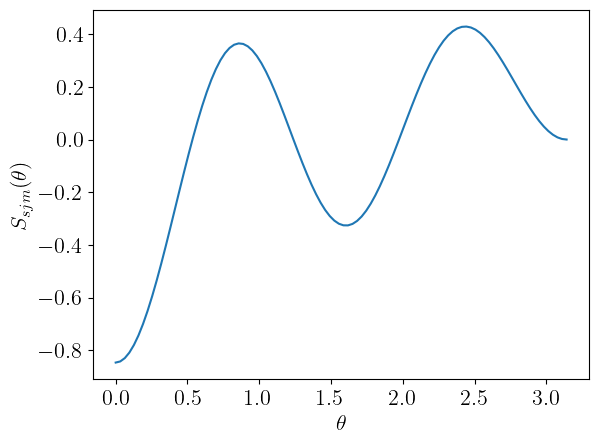

In [4]:
th = np.linspace(0, np.pi, 100)
Svals = Ssjm(th)

mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 16

plt.plot(th, Svals)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$S_{sjm}(\theta)$')
plt.show()

or we can obtain $S_{sjm\gamma}(\theta)e^{im\phi}$ by calling with two arguments

In [5]:
th = np.linspace(0, np.pi, 10)
ph = np.linspace(0, 2*np.pi, 10)
Ssjm(th, ph)

array([-0.84697178+0.j        , -0.30967315-0.25984663j,
        0.04643407+0.26334072j, -0.12881229+0.22310943j,
        0.19509496-0.07100876j,  0.25408672+0.09248j   ,
       -0.08524686-0.1476519j ,  0.07448467-0.42242355j,
        0.15713571-0.13185252j,  0.        +0.j        ])

We can also access the coupling coefficients between the spherical harmonics $Y_{slm}$ and spheroidal harmonics $S_{sjm}$ via the property `couplingcoefficients`. This returns a list of coefficients that couple to $l_\mathrm{min} \leq l \leq l_\mathrm{max}$, where $l_\mathrm{min} = \mathrm{max}[|m|,|s|]$ and $l_\mathrm{max}$ is chosen by the numerical algorithm for generating the spheroidal harmonics.

In [6]:
Ssjm.couplingcoefficients

array([ 1.18041631e-04, -1.28106306e-03, -5.21015196e-02,  9.97753389e-01,
        4.20023097e-02,  2.78394637e-03,  8.46177703e-05,  3.09135164e-06,
        7.33886369e-08,  1.90553841e-09,  3.70902839e-11,  7.56512567e-13,
        1.30968494e-14,  3.95737207e-16, -1.25777377e-16, -6.62334543e-16,
        5.63066987e-17,  2.13999700e-17, -3.29398932e-16,  2.67384169e-17,
        3.76452130e-16, -4.87183543e-16,  1.29981872e-16,  2.67012501e-16,
       -8.77180402e-17, -2.33084070e-16])

There is also a specialized function for computing the spin-weighted spherical harmonics $Y_{slm}(\theta)e^{im\phi}$, if one does not want to instantiate the `SpinWeightedSpheroidalHarmonics` to compute these more simple functions

In [7]:
from pybhpt.swsh import Yslm
print(Yslm(s, j, m, th))
print(Yslm(s, j, m, th, ph))

[-0.84628438 -0.42103697  0.24896629  0.27768706 -0.18269351 -0.28515561
  0.14545513  0.42850552  0.21141427  0.        ]
[-0.84628438+0.j         -0.32253303-0.27063735j  0.04323254+0.24518394j
 -0.13884353+0.24048405j  0.17167574-0.06248486j  0.26795862+0.09752896j
 -0.07272756-0.12596784j  0.0744092 -0.42199556j  0.16195273-0.13589447j
  0.        +0.j        ]


Lastly, we highlight that these algorithms also work for complex values of the spheroidicity

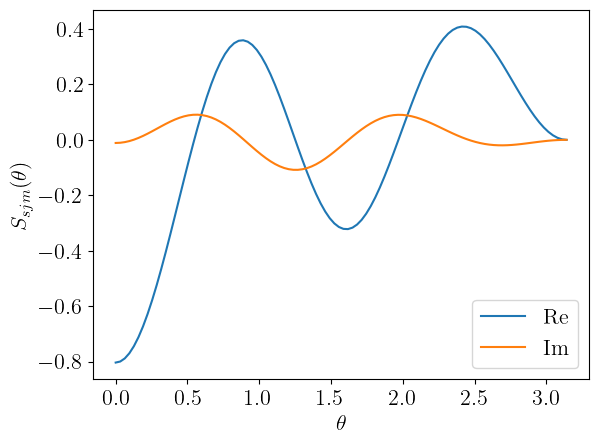

In [8]:
s = -1
j = 4
m = 1
gamma = 0.43 + 1.5j
Ssjm = SpinWeightedSpheroidalHarmonic(s, j, m, gamma)

th = np.linspace(0, np.pi, 100)
Svals = Ssjm(th)

plt.plot(th, Svals.real, label='Re')
plt.plot(th, Svals.imag, label='Im')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$S_{sjm}(\theta)$')
plt.legend()
plt.show()